In [1]:
import numpy

import rscha2d
import fibonacci_sphere
import trig
import constants
import coords
import gauge

from matplotlib import pyplot, colors, ticker
%matplotlib nbagg

In [2]:
lat_c = 42.0
lon_c = 20.0
theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-lat_c, lon_c, 26.0, 50.0))
knots_bd = numpy.arange(-2100, 2050, 50)

theta_m, phi_m = fibonacci_sphere.grid(5000)
in_cap = trig.angulardist(theta_m, phi_m, theta_c, phi_c) < theta_0d
theta_m = theta_m[in_cap]; phi_m = phi_m[in_cap]

r_m = numpy.ones_like(theta_m)*constants.a_r
times_dbd, r_dbd, theta_dbd, phi_dbd = coords.anything(r_m, theta_m, phi_m, knots_bd)

In [ ]:
model = rscha2d.Model()

In [38]:
model.set_model_params(theta_c, phi_c, theta_0d,
                       cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2, g10_ref=-30,
                       knots=knots_bd,
                       #spatial_reg=1e-4, temporal_reg=1e-3)
                       spatial_reg=1e-2, temporal_reg=1e-2)

In [39]:
model.add_data("../data/rscha2d/bd_javi_21abril.dat")

0


In [40]:
solution = model.solve(complete=True)
g = solution["coefs"]

________________________________________________________________________________
[Memory] Calling rscha2d.spatial_matrix...
spatial_matrix(array([ 6364.616525, ...,  6367.425097]), array([ 0.285267, ...,  0.254927]), array([ 1.717401, ...,  0.725822]), None, None, None)
__________________________________________________spatial_matrix - 10.7s, 0.2min


In [41]:
g

array([-0.22597609,  0.00920341, -0.01867699, ..., -0.0659204 ,
        0.03005961, -0.00997163])

In [42]:
import coords
import scha
import fibonacci_sphere
from mpl_toolkits.basemap import Basemap
import field_plots

times_long = numpy.arange(-1000, 2200, 200)
#times_long = numpy.arange(-1000, 2200, 500)

theta_in, phi_in = fibonacci_sphere.grid(n=12000)
in_cap = trig.angulardist(theta_in, phi_in, theta_c, phi_c) < model.theta_0p
theta_in = theta_in[in_cap]
phi_in = phi_in[in_cap]

rot_mat = scha.rotation_matrix(theta_c, phi_c, invert=True)

lon_c, lat_c = numpy.rad2deg((phi_c, numpy.pi/2 - theta_c))
base_cap = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-numpy.rad2deg(model.theta_0p))
base_world = Basemap(projection="aeqd", lon_0 = lon_c, lat_0 = lat_c, lat_ts=45.0,
                    width=base_cap.xmax, height=base_cap.ymax, resolution="l")

In [58]:
import importlib; importlib.reload(scha); importlib.reload(field_plots)

<module 'field_plots' from '/home/josecper/Programs/python/field_plots.py'>

In [18]:
import matplotlib

In [19]:
matplotlib.rcParams.update({'font.size': 20})

20.0 42.0


<IPython.core.display.Javascript object>


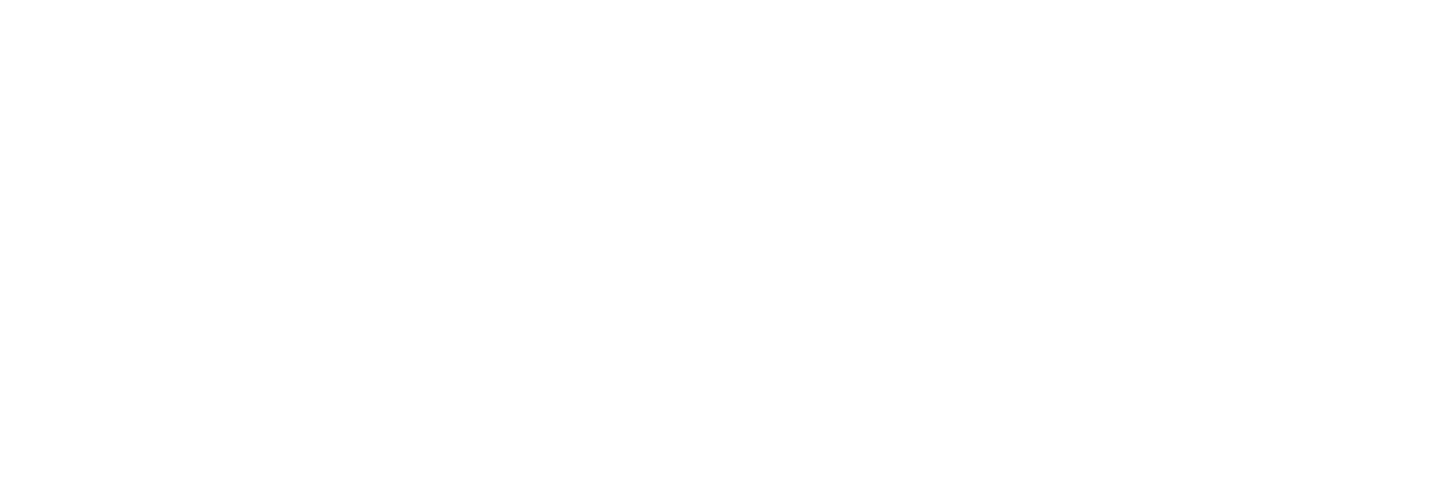

________________________________________________________________________________
[Memory] Calling rscha2d.spatial_matrix...
spatial_matrix(array([ 6371.2, ...,  6371.2]), array([ 0.450099, ...,  0.45241 ]), array([-2.103206, ...,  1.836477]), array([-1.456472, ...,  3.510151]), array([-19.20851 , ...,  21.512123]), array([ 45.996167, ...,  41.226564]))
___________________________________________________spatial_matrix - 1.1s, 0.0min
20.0 42.0


<IPython.core.display.Javascript object>


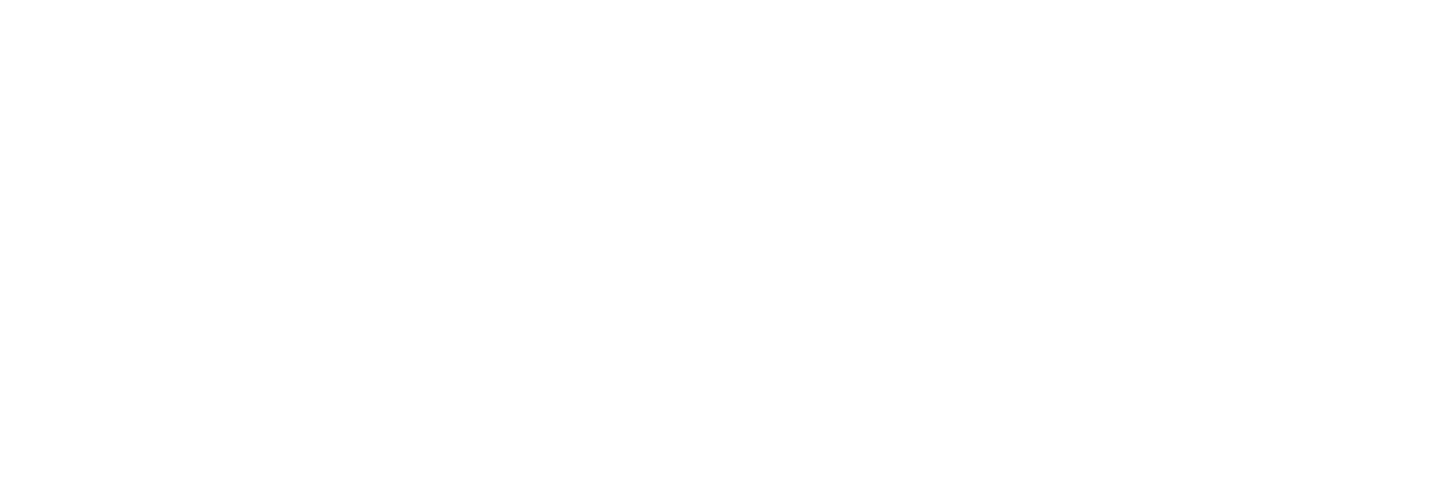

20.0 42.0


<IPython.core.display.Javascript object>


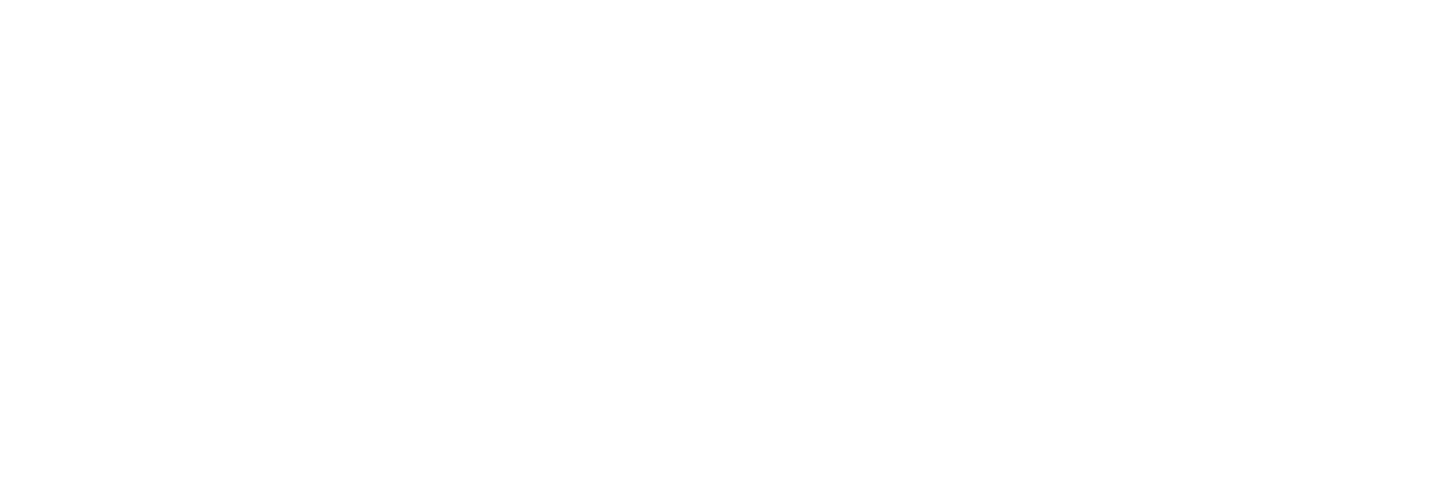

20.0 42.0


<IPython.core.display.Javascript object>


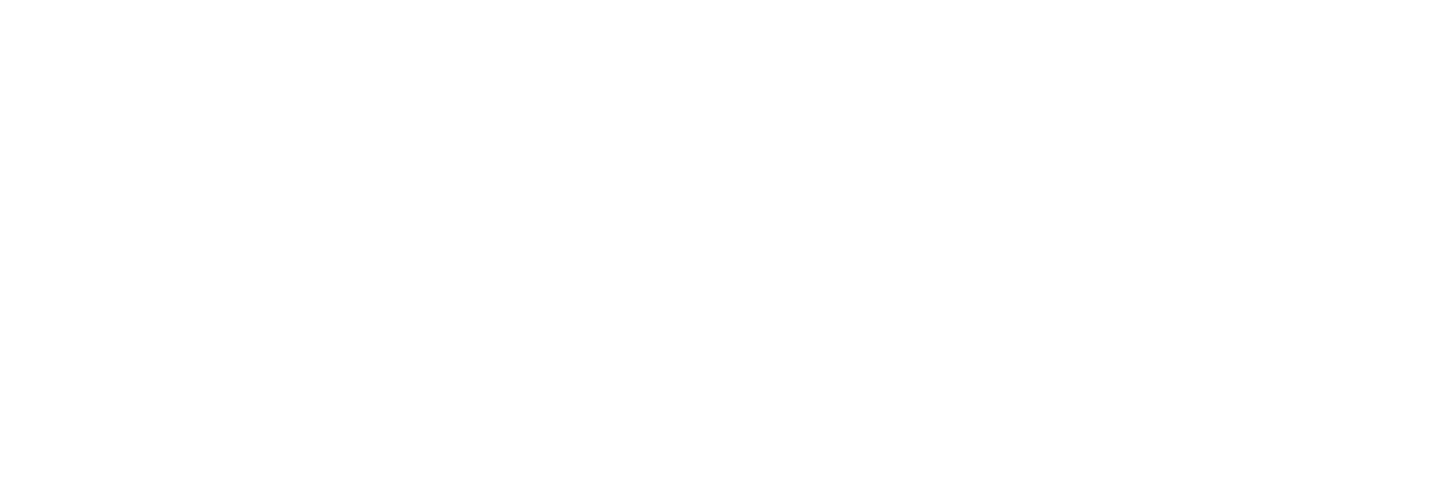

________________________________________________________________________________
[Memory] Calling rscha2d.spatial_matrix...
spatial_matrix(array([ 6371.2, ...,  6371.2]), array([ 0.450099, ...,  0.45241 ]), array([-2.103206, ...,  1.836477]), array([-1.456472, ...,  3.510151]), array([-19.20851 , ...,  21.512123]), array([ 45.996167, ...,  41.226564]))
___________________________________________________spatial_matrix - 1.1s, 0.0min
20.0 42.0


<IPython.core.display.Javascript object>


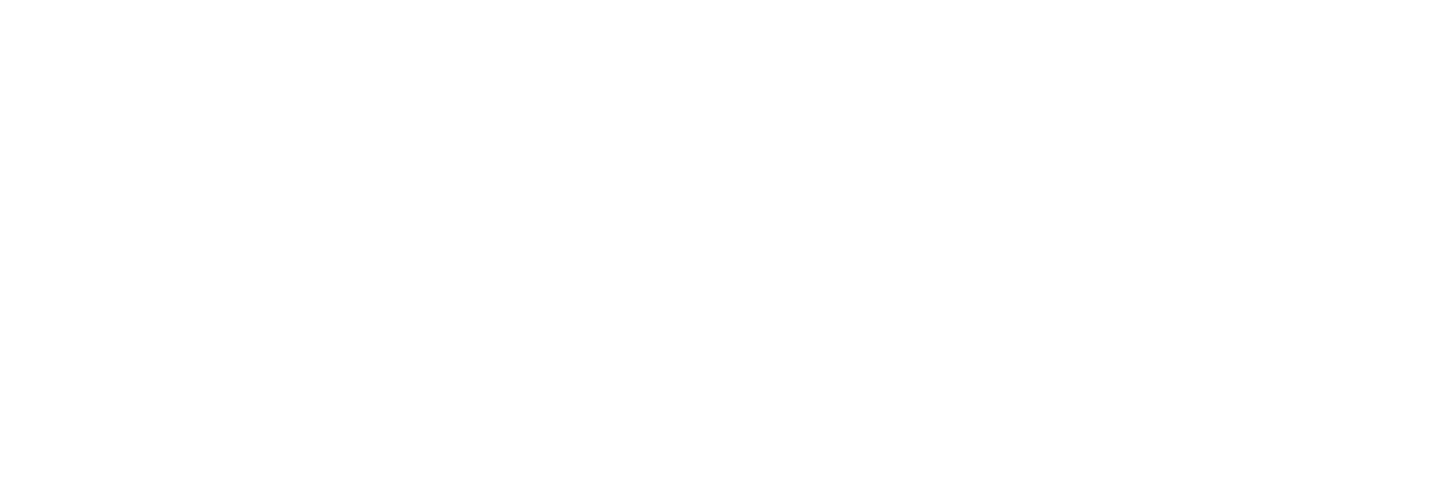

20.0 42.0


<IPython.core.display.Javascript object>


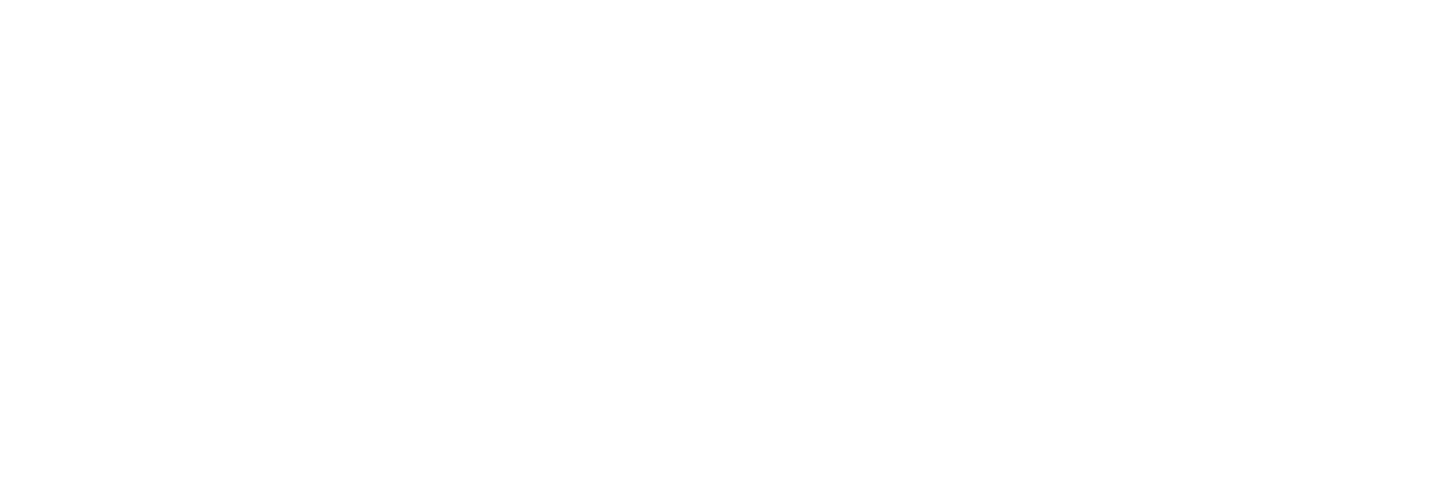

20.0 42.0


<IPython.core.display.Javascript object>


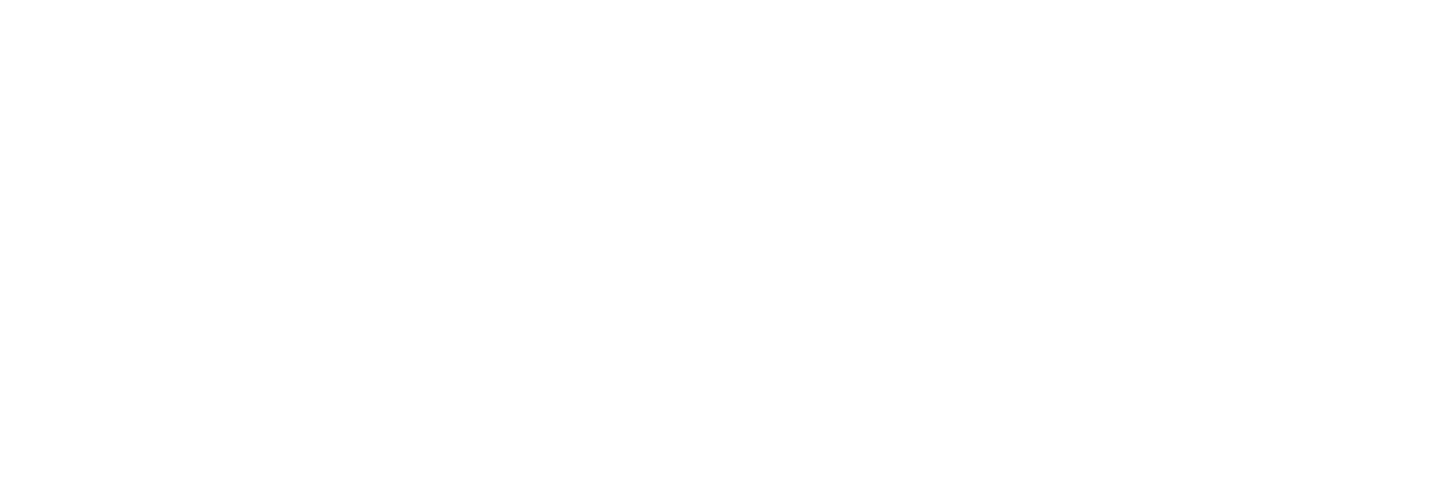

________________________________________________________________________________
[Memory] Calling rscha2d.spatial_matrix...
spatial_matrix(array([ 6371.2, ...,  6371.2]), array([ 0.450099, ...,  0.45241 ]), array([-2.103206, ...,  1.836477]), array([-1.456472, ...,  3.510151]), array([-19.20851 , ...,  21.512123]), array([ 45.996167, ...,  41.226564]))
___________________________________________________spatial_matrix - 1.1s, 0.0min
20.0 42.0


<IPython.core.display.Javascript object>


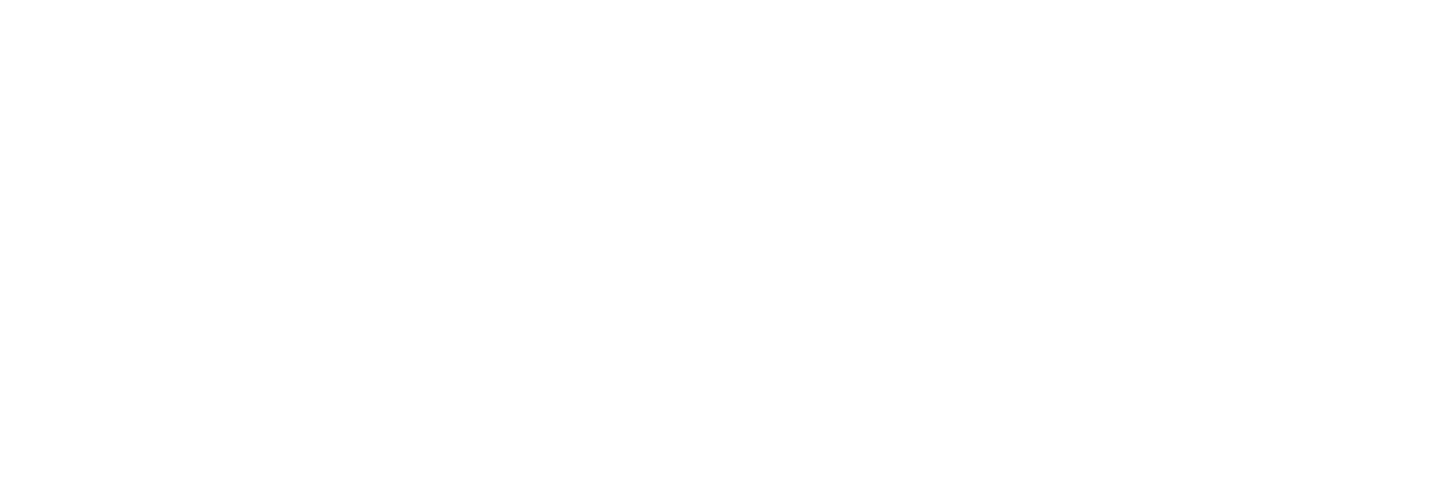

20.0 42.0


<IPython.core.display.Javascript object>


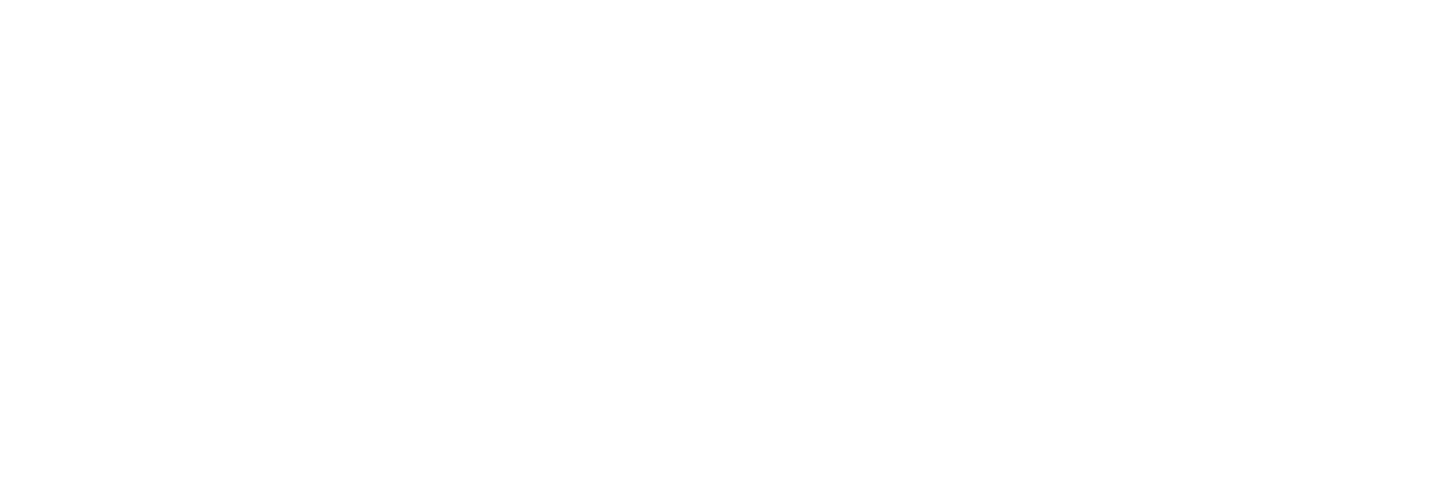

20.0 42.0


<IPython.core.display.Javascript object>


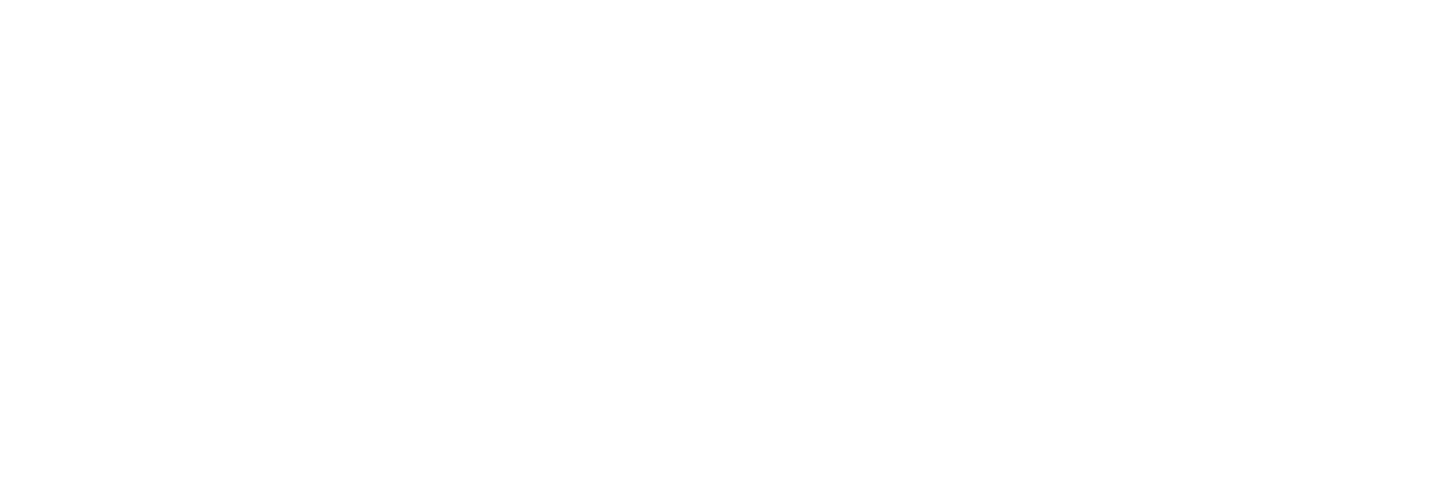

20.0 42.0


<IPython.core.display.Javascript object>


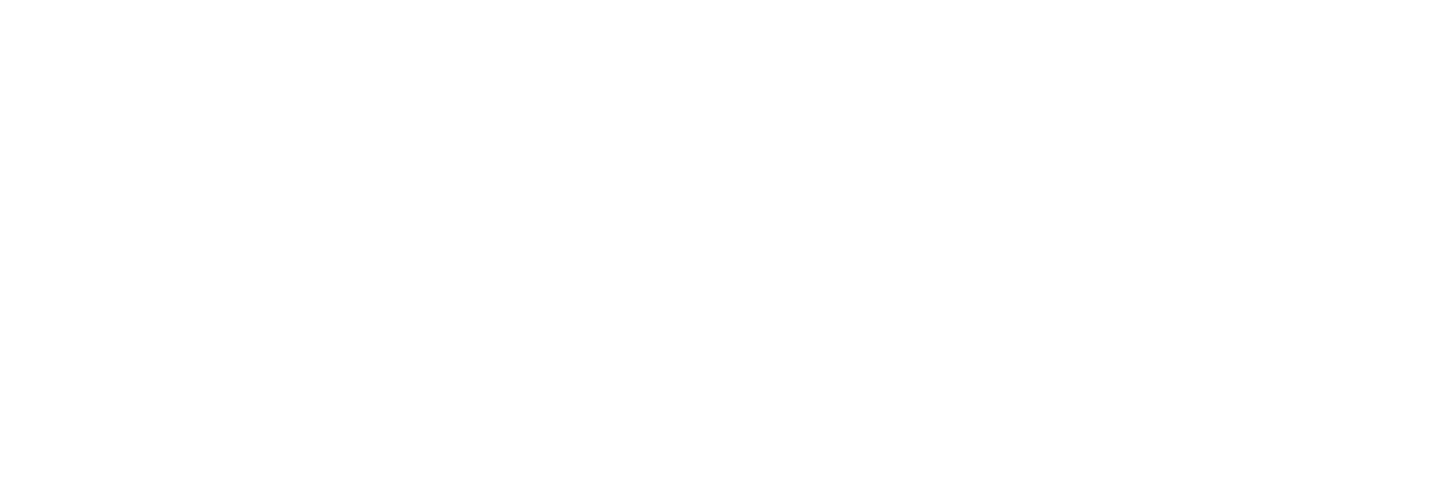

20.0 42.0


<IPython.core.display.Javascript object>


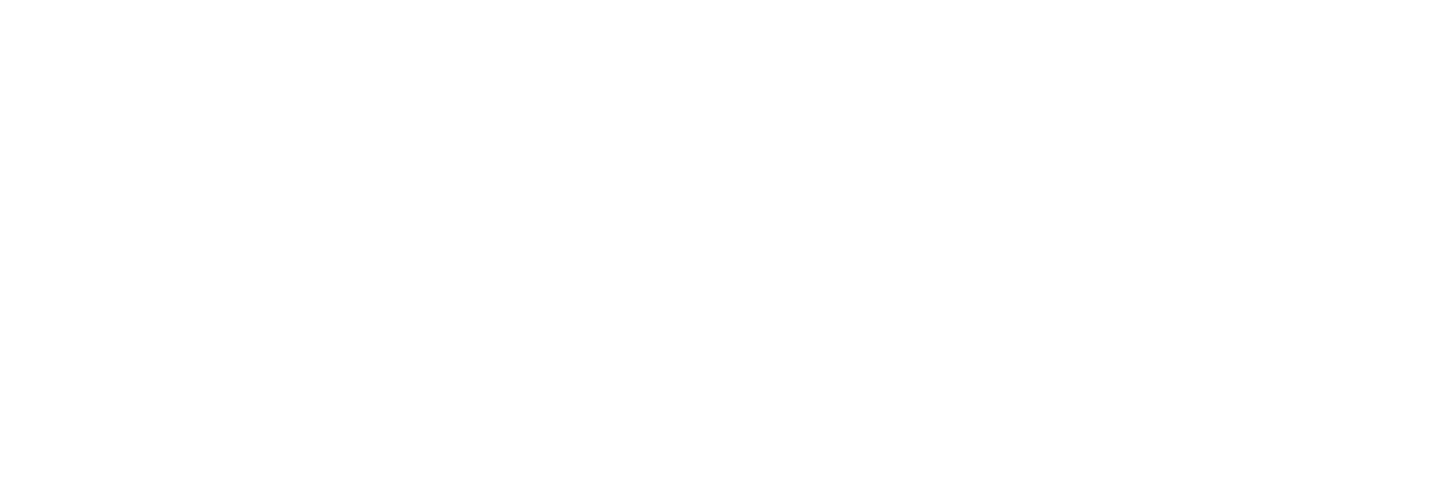

20.0 42.0


<IPython.core.display.Javascript object>


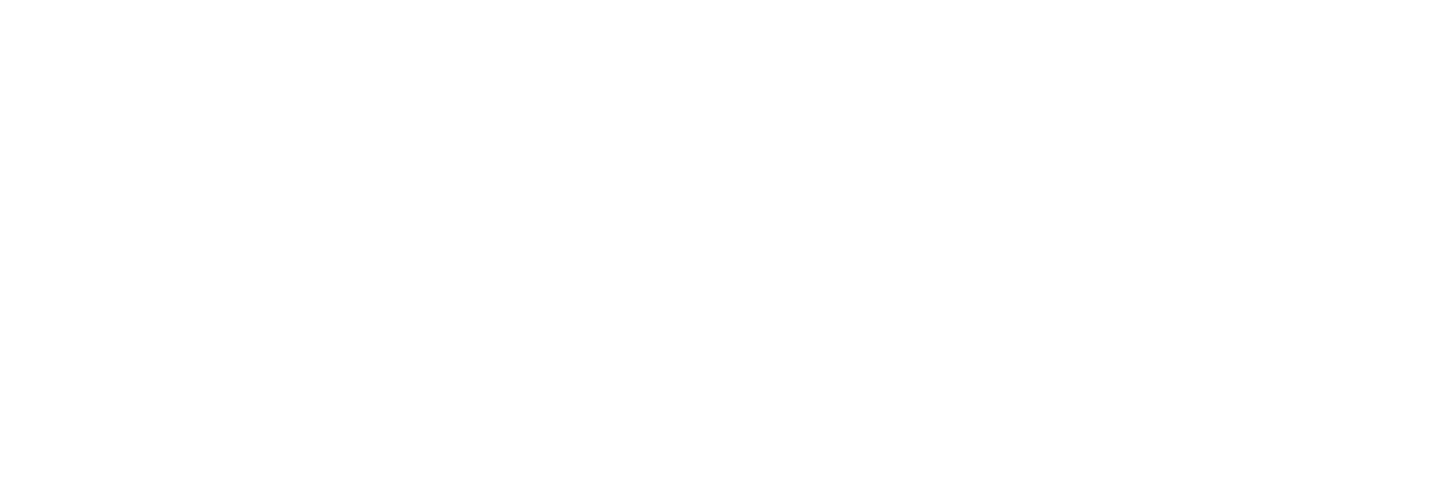

20.0 42.0


<IPython.core.display.Javascript object>


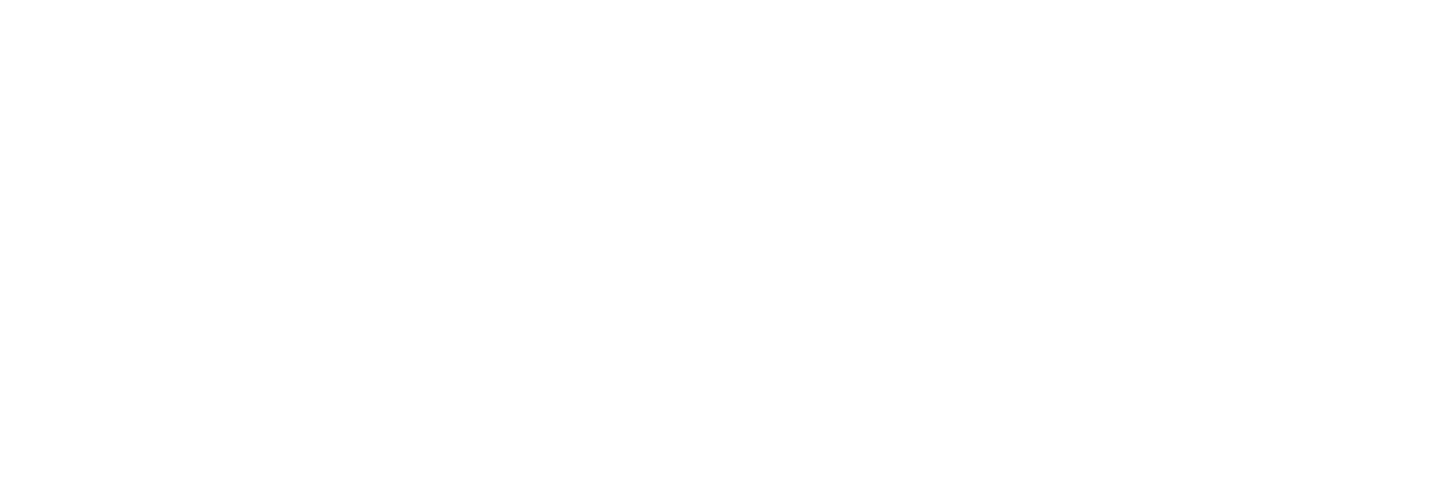

20.0 42.0


<IPython.core.display.Javascript object>


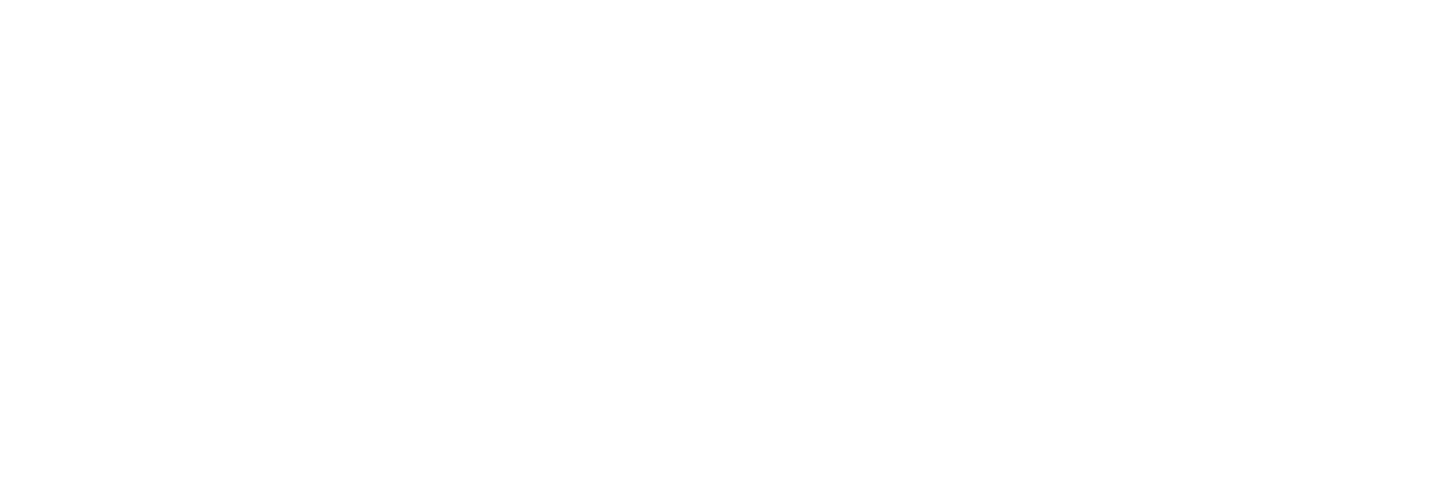

20.0 42.0


<IPython.core.display.Javascript object>


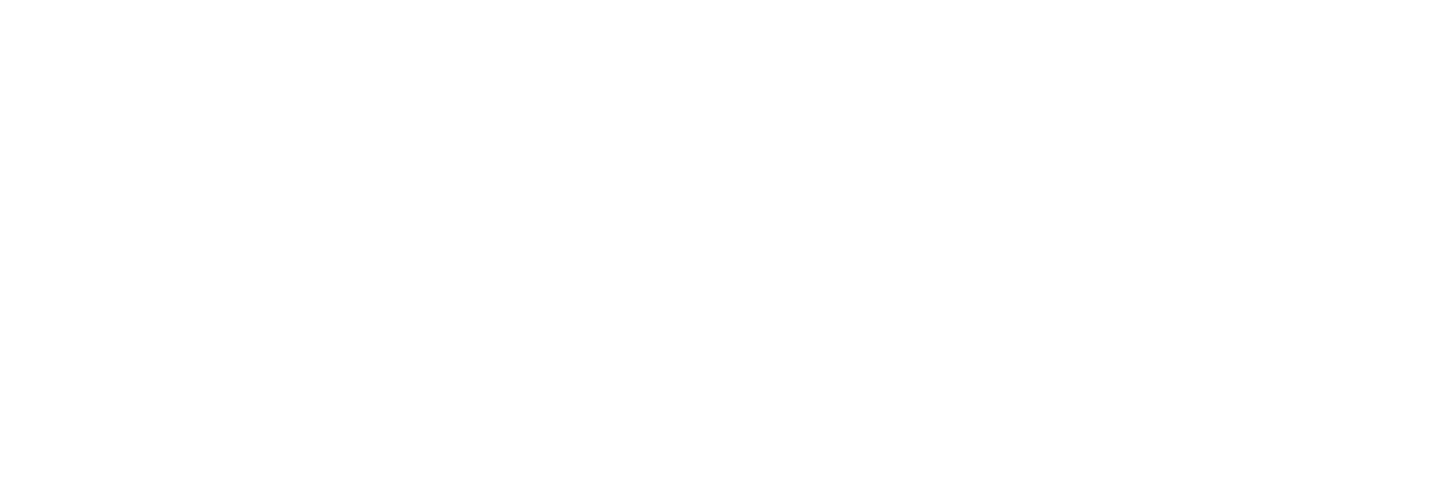

In [59]:
matplotlib.rcParams.update({'font.size': 20})

for jj, time in enumerate(times_long):

    timev = numpy.atleast_1d(time)
    times_d, r_d, theta_d, phi_d = coords.anything(numpy.ones_like(theta_in)
                                                   *constants.a_r,
                                                   theta_in,
                                                   phi_in,
                                                   timev)

    r_dg, theta_dg, phi_dg = trig.geo2sph(theta_d, phi_d)
    r_dgr, theta_dgr, phi_dgr = scha.rotate_coords(r_dg, theta_dg, 
                                                   phi_dg, rot_mat)
    
    D_m, I_m, F_m = model.synth_data(times_d, r_d, theta_d, phi_d)
    
    fig = field_plots.component_residual_plot(
                    theta_dgr, phi_dgr,
                    model.theta_0p,
                    theta_c, phi_c,
                    (numpy.rad2deg(D_m), numpy.rad2deg(I_m), F_m),
                    scales=("symmetric", "positive", "positive"),
                    cmaps=("Spectral", "Spectral", "Spectral"),
                    titles=("D (°)", "I (°)", "F $(\mu T)$"),
                    cbar=False,
                    lines=0, nlevels=15,
                    lims=((-50, 50), (0, 90), (30, 90)))
    #fig.suptitle('t = {} years AD'.format(time))
    fig.savefig('../data/rscha2d/mapas/rscha2d_{jj:04d}_{time:d}.png'.format(jj=jj, time=int(time)),
                frameon=True)
    pyplot.close(fig)

<IPython.core.display.Javascript object>


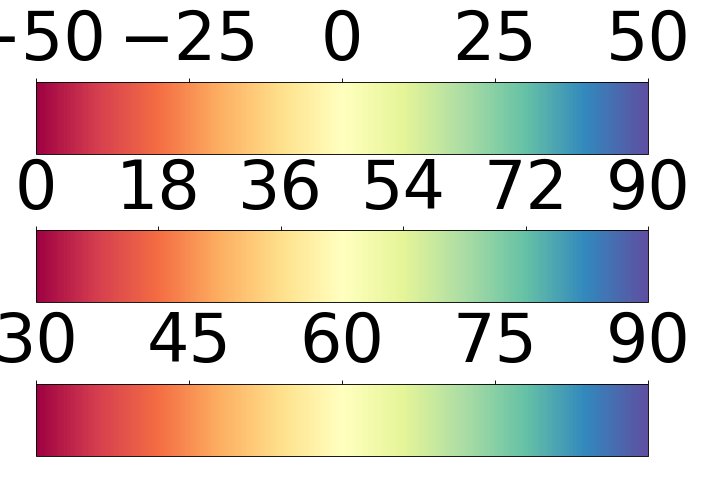

In [90]:
#### Make a figure and axes with dimensions as desired.
matplotlib.rcParams.update({'font.size': 60})

fig = pyplot.figure(figsize=(9, 6))
ax1 = fig.add_axes([0.05, 0.68, 0.85, 0.15])
ax2 = fig.add_axes([0.05, 0.37, 0.85, 0.15])
ax3 = fig.add_axes([0.05, 0.05, 0.85, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = matplotlib.cm.Spectral
cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=matplotlib.colors.Normalize(vmin=-50, vmax=50),
                                ticks = numpy.arange(-50, 75, 25),
                                ticklocation="top",
                                orientation='horizontal')
cb2 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=matplotlib.colors.Normalize(vmin=-0, vmax=90),
                                ticks = numpy.arange(0, 108, 18),
                                ticklocation="top",
                                orientation='horizontal')
cb3 = matplotlib.colorbar.ColorbarBase(ax3, cmap=cmap,
                                norm=matplotlib.colors.Normalize(vmin=30, vmax=90),
                                ticks = numpy.arange(30, 120, 15),
                                ticklocation="top",
                                orientation='horizontal')

In [68]:
90/5

18.0